In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew

In [2]:
Dataset = pd.read_csv(r"E:\Projects\Anomaly Detection\Dataset\Normalized\FinalNormalizedDataset.csv")

In [3]:
Names = Dataset.columns.tolist()

print(Names)

['Unnamed: 0', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'FlowBytes', 'FlowPackets', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'FwdPackets', 'BwdPackets', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down Up Ratio', 'Average Packet

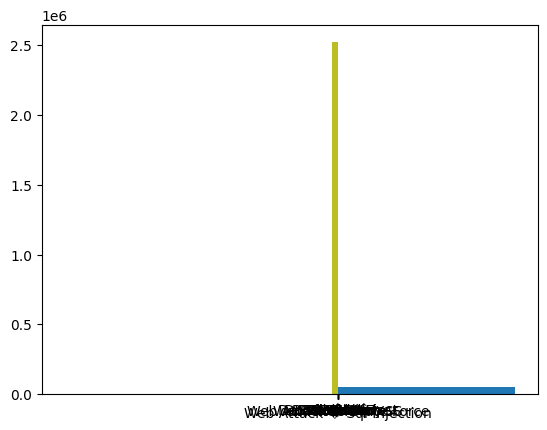

In [4]:
for i in range(len(Names)):
    Data = Dataset[Names[i]]
    plt.hist(Data, bins = 50)

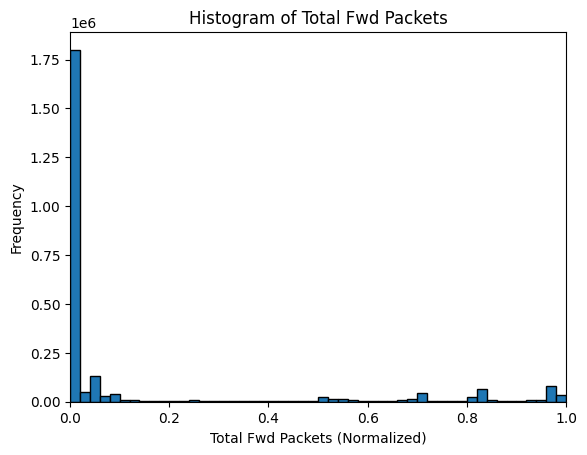

In [5]:
plt.hist(Data, bins=50, edgecolor='black', )
plt.xlim(0,1)
plt.xlabel("Total Fwd Packets (Normalized)")
plt.ylabel("Frequency")
plt.title("Histogram of Total Fwd Packets")
plt.show()


In [21]:
Data = BenignDataset['Total Fwd Packets']

<Axes: xlabel='Total Fwd Packets', ylabel='Count'>

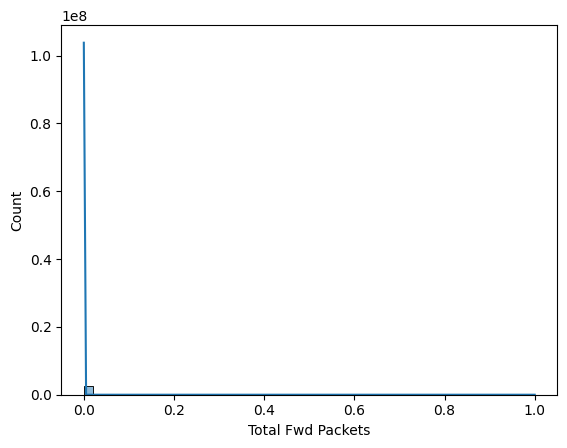

In [7]:
sns.histplot(Data, bins=50, kde=True)

In [8]:
Test = np.log1p(1 - Data)
Test2 = np.power(Data, 2)
Test3 = np.power(Data, 3)
Test4 = np.exp(Data)

<Axes: xlabel='Total Fwd Packets', ylabel='Count'>

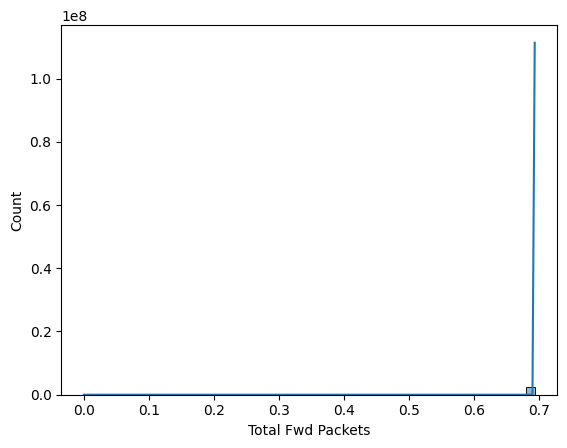

In [9]:
sns.histplot(Test, bins=50, kde=True)

In [10]:
print(skew(Test))
print(skew(Test2))
print(skew(Test3))
print(skew(Test4))

-237.75812434360364
255.07981287108254
275.7295092629114
241.418114886239


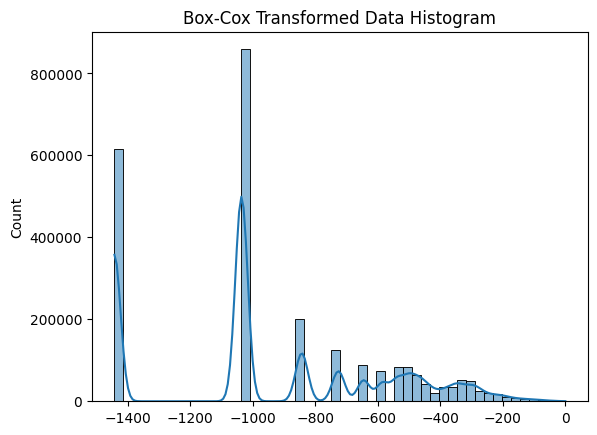

New Skewness: 0.1873104662227512


In [11]:
from scipy.stats import boxcox

Data_shifted = Data + 1e-6  # Shift to avoid zero issues
Data_boxcox, _ = boxcox(Data_shifted)

sns.histplot(Data_boxcox, bins=50, kde=True)
plt.title("Box-Cox Transformed Data Histogram")
plt.show()

print(f"New Skewness: {skew(Data_boxcox)}")


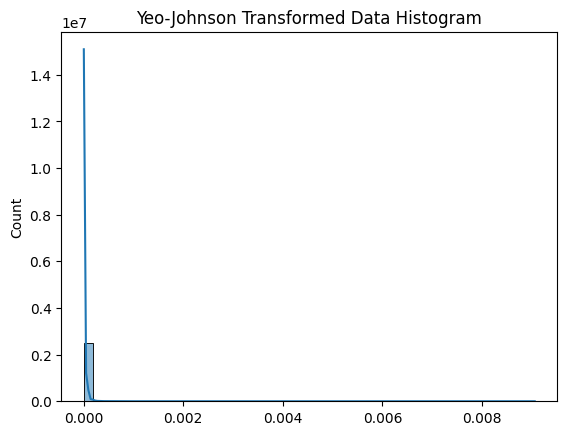

New Skewness: 39.43978457746858


In [12]:
from scipy.stats import yeojohnson

Data_yeojohnson, _ = yeojohnson(Data + 1e-6)  # Small shift to avoid zeros
sns.histplot(Data_yeojohnson, bins=50, kde=True)
plt.title("Yeo-Johnson Transformed Data Histogram")
plt.show()

print(f"New Skewness: {skew(Data_yeojohnson)}")


In [13]:
zero_ratio = (Data == 0).sum() / len(Data)
print(f"Percentage of Zeros: {zero_ratio * 100:.2f}%")


Percentage of Zeros: 0.00%


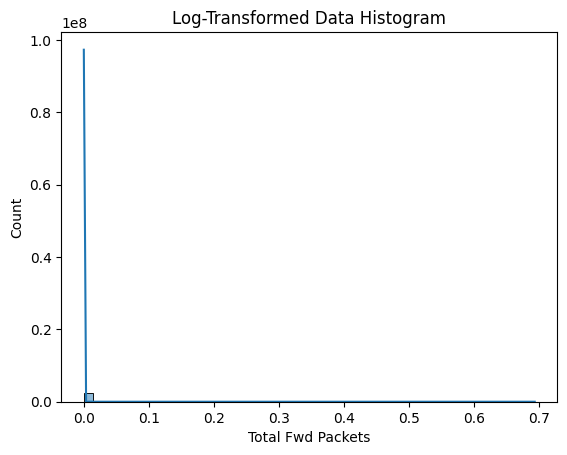

New Skewness: 223.84293190610904


In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

Data_log = np.log1p(Data)  # Log transformation

# Plot histogram
sns.histplot(Data_log, bins=50, kde=True)
plt.title("Log-Transformed Data Histogram")
plt.show()

# Print new skewness
print(f"New Skewness: {skew(Data_log)}")


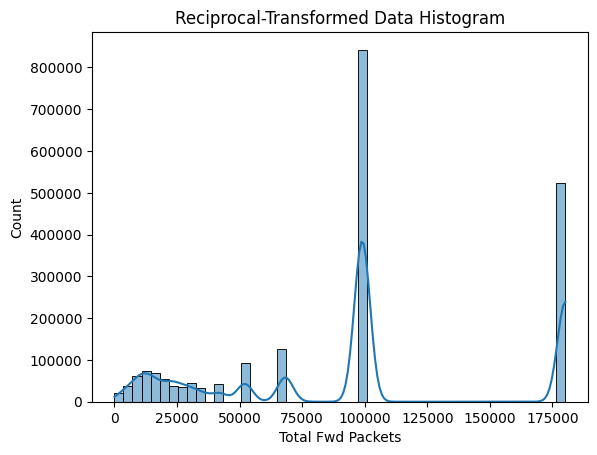

New Skewness: 0.15080645664203404


In [22]:
Data_reciprocal = 1 / (Data + 1e-6)  # Add small value to avoid division by zero

sns.histplot(Data_reciprocal, bins=50, kde=True)
plt.title("Reciprocal-Transformed Data Histogram")
plt.show()

print(f"New Skewness: {skew(Data_reciprocal)}")


In [17]:
BenignDataset = Dataset[Dataset['Label'] == 0]

[0]
